In [1]:
import process as pc
import detection as dt
import dataset as ds
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [2]:
def print_image(image, keypoints : np.ndarray):
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if keypoints is None:
        pass
    elif keypoints.shape == (4,):
        rect = patches.Rectangle((keypoints[0], keypoints[1]), keypoints[2]-keypoints[0], keypoints[3]-keypoints[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    else:
        for kp in keypoints:
            rect = patches.Rectangle((kp[0], kp[1]), kp[2]-kp[0], kp[3]-kp[1], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show();

In [3]:
pipeline_save_path = ds.DATA_PATH+"/hog_new_dataset.pkl"
image_path = ds.DATA_PATH+"/final/amadeus.jpg"

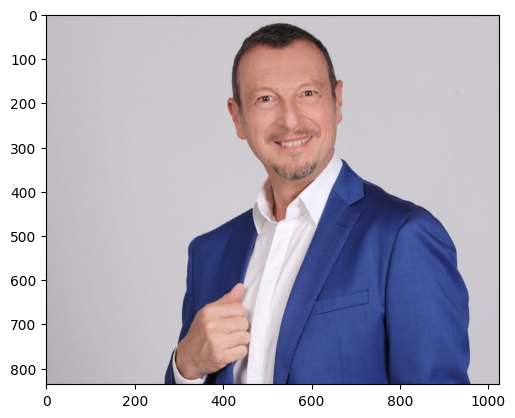

In [4]:
from skimage.feature import hog
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

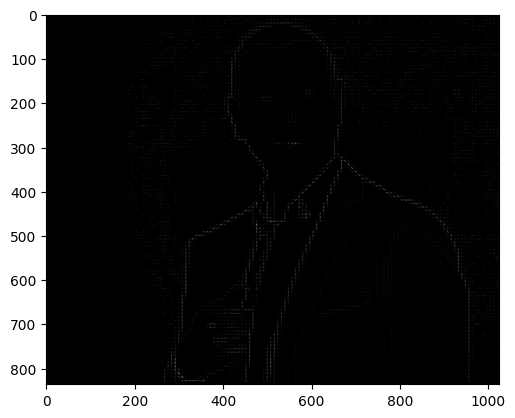

In [5]:
image = cv2.imread(image_path)
image = pc.process_image(image, resize=False, denoise=True)
features, hog_img = hog(image, visualize=True)
plt.imshow(hog_img, cmap='gray');

In [6]:
image.shape

(836, 1024)

In [7]:
image = cv2.imread(image_path)
ratios = None
if (image.shape[0] > 512 and image.shape[1] > 512):
    params_reshape = {
        'resize': True,
        'image_size': (256, 256)
    }
    ratios = [image.shape[0]/256, image.shape[1]/256]
else:
    params_reshape = {
        'resize': False
    }
pipeline = joblib.load(pipeline_save_path)
boxes, face_kp, scores = dt.detect_faces(image, pipeline, method='HOG', threshold=0.62, overlap_threshold=0.3, window_size=(96,96), step_size=(16,16),\
                                n_keypoints=8100, **params_reshape, verbose=True, notebook=True)

(1336, 8100)
[0 0 0 ... 0 0 0] [0.07646538 0.04750006 0.09279455 ... 0.18512267 0.21392949 0.11661426]
2
1.25
(2, 4)
[0.62883326 0.62125496]
[[ 80 200 128 248]
 [102  25 178 101]]


In [8]:
boxes, scores

(array([[ 80, 200, 128, 248],
        [102,  25, 178, 101]]),
 array([0.62883326, 0.62125496]))

In [9]:
if ratios:
    if boxes is None:
        pass
    elif boxes.shape == (4,):
        boxes = [boxes[i] * ratios[1] if i%2==0 else boxes[i] * ratios[0] for i in range(len(boxes))]
        boxes = np.array(boxes)
    else:
        box_shape = boxes.shape[0]
        for box in boxes:
            box = [int(box[i] * ratios[1]) if i%2==0 else int(box[i] * ratios[0]) for i in range(len(box))]
            boxes = np.vstack((boxes, box))
        box_shape
        boxes = np.delete(boxes, np.s_[:box_shape], axis=0)
boxes

2

array([[320, 653, 512, 809],
       [408,  81, 712, 329]])

In [10]:
boxes

array([[320, 653, 512, 809],
       [408,  81, 712, 329]])

In [11]:
for fc in face_kp:
    print(fc[1:])

[160, 400]
[128, 32]


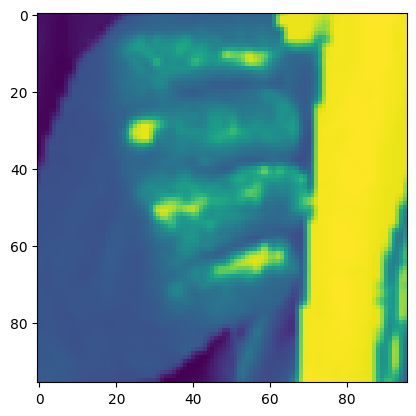

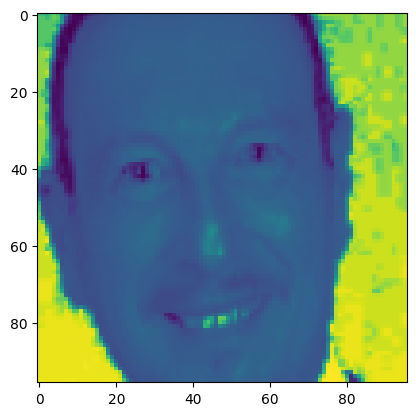

In [12]:
for i in range(len(face_kp)):
    plt.imshow(face_kp[i][0])
    plt.show();


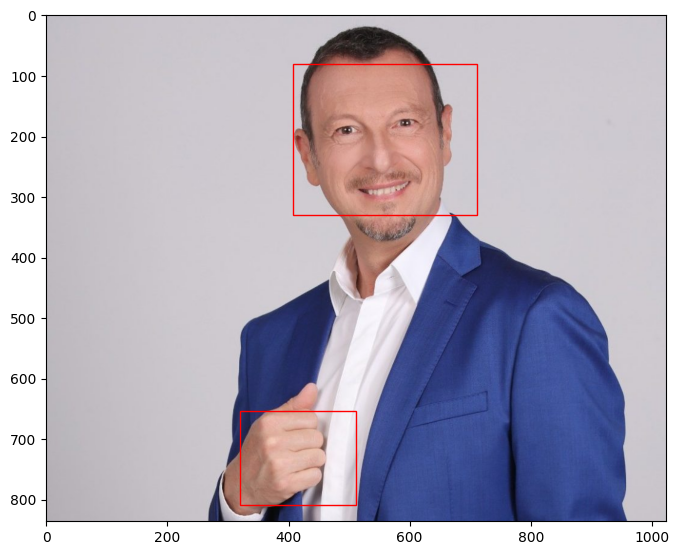

array([0.62883326, 0.62125496])

In [13]:
print_image(image, boxes)
scores